In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import fisher_exact
demos = pd.read_csv("Desktop/Case Study Data/demos.csv")
enroll_data = pd.read_csv("Desktop/Case Study Data/enroll_data.csv")
web_data = pd.read_csv("Desktop/Case Study Data/web_data.csv")

In [2]:
demos[["click_dt", "bounce_dt", "open_dt"]] = demos[["click_dt", "bounce_dt", "open_dt"]].apply(pd.to_datetime)
enroll_data[["enrll_dt", "unenrll_dt"]] = enroll_data[["enrll_dt", "unenrll_dt"]].apply(pd.to_datetime)
web_data[["hit_dt"]] = web_data[["hit_dt"]].apply(pd.to_datetime)

In [3]:
sent = demos[demos["campaign"] != 2]
len(sent)

37298

In [4]:
bounce = sent[sent['bounce_dt'].notna()]
len(bounce)

31

In [5]:
delivered = sent[sent['bounce_dt'].isna()]
len(delivered)

37267

In [6]:
opened = delivered[delivered['open_dt'].notna()]
unopened = delivered[delivered['open_dt'].isna()]

len(opened), len(unopened)

(18788, 18479)

In [7]:
clicked = opened[opened["click_dt"].notna()]
unclicked = opened[opened["click_dt"].isna()]
len(clicked), len(unclicked)

(9377, 9411)

In [8]:
demos.shape, enroll_data.shape, web_data.shape

((41767, 12), (164, 6), (77304, 4))

In [9]:
demos = demos.drop_duplicates()
enroll_data = enroll_data.drop_duplicates()
web_data = web_data[web_data["page"] == "welcome"]
web_data = web_data.drop_duplicates(subset = ["part_id", "page"], keep = "first")
demos.shape, enroll_data.shape, web_data.shape

((41767, 12), (143, 6), (5014, 4))

In [10]:
clicked_welcome = clicked.merge(web_data, on = "part_id", how = "left")
clicked_welcome = clicked_welcome[clicked_welcome["page"].notna()]
unclicked_welcome = unclicked.merge(web_data, on = "part_id", how = "left")
unclicked_welcome = unclicked_welcome[unclicked_welcome["page"].notna()]
len(clicked_welcome), len(unclicked_welcome)

(216, 154)

In [11]:
ended_welcome = pd.concat([clicked_welcome, unclicked_welcome], ignore_index = True)
ended_welcome = ended_welcome.merge(enroll_data, on = "part_id", how = "left")
not_enrolled = ended_welcome[ended_welcome["enrll_dt"].isna()]
enrolled = ended_welcome[ended_welcome["enrll_dt"].notna()]
enrolled = enrolled[enrolled["enrll_dt"] >= enrolled["open_dt"]]
len(not_enrolled), len(enrolled)

(343, 27)

In [12]:
merged = demos.merge(enroll_data, on = "part_id", how ="left")
merged.shape

(41767, 17)

In [13]:
merged.head()

,part_id,fund_ct,logon_ct,call_ct,balance,tenure,age,gender,campaign,click_dt,bounce_dt,open_dt,curr_enrll_fl,unenrll_fl,curr_enrll_status,enrll_dt,unenrll_dt
0,1054161513,6,11,1,70377.57,6.0,44.2,0,0,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1,5761909860,7,13,2,63505.69,6.6,44.2,0,1,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaT
2,9130086586,6,13,2,55933.94,5.9,43.7,1,1,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaT
3,5496433327,6,12,2,81072.63,5.5,45.5,0,1,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaT
4,8917877079,8,12,0,87534.41,3.8,45.3,1,0,NaT,NaT,2020-12-14,NaN,NaN,NaN,NaT,NaT


In [14]:
merged = merged.merge(web_data, on = "part_id", how ="left")
merged.shape

(41767, 20)

In [15]:
merged.head()

,part_id,fund_ct,logon_ct,call_ct,balance,tenure,age,gender,campaign,click_dt,bounce_dt,open_dt,curr_enrll_fl,unenrll_fl,curr_enrll_status,enrll_dt,unenrll_dt,web_session_id,hit_dt,page
0,1054161513,6,11,1,70377.57,6.0,44.2,0,0,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN
1,5761909860,7,13,2,63505.69,6.6,44.2,0,1,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN
2,9130086586,6,13,2,55933.94,5.9,43.7,1,1,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN
3,5496433327,6,12,2,81072.63,5.5,45.5,0,1,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN
4,8917877079,8,12,0,87534.41,3.8,45.3,1,0,NaT,NaT,2020-12-14,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN


In [16]:
merged[["click_dt", "bounce_dt", "open_dt", "enrll_dt", "unenrll_dt", "hit_dt"]] = merged[[
    "click_dt", "bounce_dt", "open_dt", "enrll_dt", "unenrll_dt", "hit_dt"]].apply(pd.to_datetime)

In [17]:
merged.dtypes

part_id                       int64
fund_ct                       int64
logon_ct                      int64
call_ct                       int64
balance                     float64
tenure                      float64
age                         float64
gender                        int64
campaign                      int64
click_dt             datetime64[ns]
bounce_dt            datetime64[ns]
open_dt              datetime64[ns]
curr_enrll_fl               float64
unenrll_fl                  float64
curr_enrll_status            object
enrll_dt             datetime64[ns]
unenrll_dt           datetime64[ns]
web_session_id              float64
hit_dt               datetime64[ns]
page                         object
dtype: object

In [18]:
start_date = pd.to_datetime('2020-07-30')
end_date = pd.to_datetime('2020-08-29')
filtered_merged = merged[(merged['open_dt'] >= start_date) & (merged['open_dt'] <= end_date)]
filtered_merged.head()

,part_id,fund_ct,logon_ct,call_ct,balance,tenure,age,gender,campaign,click_dt,bounce_dt,open_dt,curr_enrll_fl,unenrll_fl,curr_enrll_status,enrll_dt,unenrll_dt,web_session_id,hit_dt,page
38,5582493593,6,11,0,70610.76,6.2,44.3,0,0,NaT,NaT,2020-08-14,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN
47,6165669036,6,12,0,63470.46,6.1,44.4,1,0,2020-11-07,NaT,2020-07-30,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN
64,7359848765,7,12,0,60009.89,5.3,45.3,1,0,NaT,NaT,2020-08-14,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN
77,1172782033,7,11,2,81498.82,4.7,44.3,0,1,2020-11-09,NaT,2020-08-22,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN
81,667563238,8,13,0,86179.19,5.5,44.4,0,0,2020-10-17,NaT,2020-08-02,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN


In [19]:
filtered_merged.shape

(3520, 20)

In [20]:
filtered_merged["open_dt"].dt.month.value_counts()

8    3290
7     230
Name: open_dt, dtype: int64

In [21]:
creative_A = filtered_merged[filtered_merged["campaign"] == 0]
creative_B = filtered_merged[filtered_merged["campaign"] == 1]
creative_A.shape, creative_B.shape

((1281, 20), (1859, 20))

In [22]:
creative_A["page"].value_counts(), creative_B["page"].value_counts()

(welcome    29
 Name: page, dtype: int64,
 welcome    36
 Name: page, dtype: int64)

### Summary for Question 1: Based on the creative that the advisor received, is there enough evidence to conclude that there is a difference in the advisor’s likelihood to access the process to sign up for DI on the web?

We know that for the 1281 people who received Creative A in the timeframe, 29 of them ended up on the welcome page. This gives us 1252 people who did not end up on the welcome page. The conversion rate for people ending up on the welcome page from Creative A is 29/1281, 0.02263856362, or about 2.3%

Of the 1859 people who received Creative B in the timeframe, 36 of them ended up on the welcome page. This gives us 1823 people who did not end up on the welcome page. The conversion rate for people ending up on the welcome page from Creative B is 36/1859, 0.01936525013, or about 1.9%

Let's do Fisher's Exact Test on these numbers to see if they are statistically significant, and thus tell us if these creatives make a statistically significant difference.
We will use a confidence interval of 95%, which gives us a p-value of 0.05 to compare against. Anything less than it means our test is statistically significant, any greater means our test does not yield statistically significant results.

In [23]:
tbl = np.array([ [1252, 29], 
                [1823, 36] ] )
tbl

array([[1252,   29],
       [1823,   36]])

In [24]:
OR, pvalue = fisher_exact(tbl)
OR, pvalue

(0.8525545236158663, 0.5265779527812324)

### Question 1 Answer

Since we got a p-value of about 0.53, which is much higher than 0.05, we cannot say there is enough evidence to conclude that there is a difference in the advisor's likelihood to access the process to sign up for DI on the web.

In [25]:
filtered_merged["enrll_dt"].value_counts().sort_index()

2020-05-03    1
2020-07-14    2
2020-07-24    1
2020-07-31    1
2020-08-02    1
2020-08-03    2
2020-08-06    2
2020-08-07    2
2020-08-08    1
2020-08-09    1
2020-08-10    1
2020-08-13    2
2020-08-14    1
2020-08-15    1
2020-08-18    1
2020-08-20    2
2020-08-22    1
2020-08-25    1
2020-08-26    5
2020-09-01    1
2020-09-08    1
2020-09-11    1
2020-09-23    1
2020-10-01    1
2020-10-26    1
2020-11-04    1
2020-12-01    1
2020-12-17    1
Name: enrll_dt, dtype: int64

In [26]:
filtered_merged[filtered_merged["enrll_dt"] == pd.to_datetime("2020-07-14")]

,part_id,fund_ct,logon_ct,call_ct,balance,tenure,age,gender,campaign,click_dt,bounce_dt,open_dt,curr_enrll_fl,unenrll_fl,curr_enrll_status,enrll_dt,unenrll_dt,web_session_id,hit_dt,page
37318,7583805956,5,11,0,73233.01,5.5,45.3,1,2,NaT,NaT,2020-08-12,1.0,0.0,Enrolled,2020-07-14,NaT,NaN,NaT,NaN
37343,6560607764,6,13,0,44360.50,7.4,45.7,0,2,NaT,NaT,2020-08-08,1.0,0.0,Enrolled,2020-07-14,NaT,NaN,NaT,NaN


In [27]:
enroll = filtered_merged[filtered_merged["enrll_dt"] >= filtered_merged["open_dt"]]

In [28]:
filtered_merged.shape, enroll.shape

((3520, 20), (34, 20))

In [29]:
enroll

,part_id,fund_ct,logon_ct,call_ct,balance,tenure,age,gender,campaign,click_dt,bounce_dt,open_dt,curr_enrll_fl,unenrll_fl,curr_enrll_status,enrll_dt,unenrll_dt,web_session_id,hit_dt,page
788,1284743023,6,13,0,56107.42,6.4,46.3,1,1,2020-08-26,NaT,2020-08-26,1.0,0.0,Enrolled,2020-08-26,NaT,8.930261e+09,2020-08-26,welcome
1705,3545706223,6,11,2,77382.80,8.5,44.7,0,1,2020-08-11,NaT,2020-08-11,1.0,0.0,Enrolled,2020-09-01,NaT,9.979208e+09,2020-08-11,welcome
6538,6481540801,5,10,0,73078.44,5.8,45.2,0,0,2020-08-03,NaT,2020-08-03,1.0,0.0,Enrolled,2020-08-03,NaT,1.968138e+09,2020-08-03,welcome
6833,1926202122,6,12,2,78383.04,5.9,44.6,0,1,2020-08-15,NaT,2020-08-15,1.0,0.0,Enrolled,2020-09-23,NaT,NaN,NaT,NaN
8242,7591895189,6,11,2,85736.15,7.3,44.9,0,1,2020-08-09,NaT,2020-08-09,1.0,0.0,Enrolled,2020-09-11,NaT,6.404332e+09,2020-08-09,welcome
10528,8787149750,7,12,2,78265.26,5.3,44.5,0,1,2020-08-06,NaT,2020-08-06,1.0,0.0,Enrolled,2020-08-06,NaT,6.099335e+09,2020-08-06,welcome
10779,4651104664,6,11,2,92444.86,5.0,44.7,1,1,2020-08-10,NaT,2020-08-10,1.0,0.0,Enrolled,2020-08-26,NaT,1.224021e+08,2020-08-10,welcome
13477,7809583246,6,12,2,75068.63,4.5,44.6,0,1,2020-08-26,NaT,2020-08-26,1.0,0.0,Enrolled,2020-08-26,NaT,9.420903e+09,2020-08-26,welcome
13637,2881962842,6,13,0,64724.11,5.7,44.0,0,1,2020-08-07,NaT,2020-08-02,1.0,0.0,Enrolled,2020-09-08,NaT,1.260054e+09,2020-08-07,welcome
16384,9442243561,5,14,2,88679.26,6.6,46.6,0,1,2020-07-31,NaT,2020-07-31,1.0,0.0,Enrolled,2020-07-31,NaT,NaN,NaT,NaN


In [30]:
len(enroll[enroll["campaign"] == 0]), len(enroll[enroll["campaign"] == 1]), len(enroll[enroll["campaign"] == 2])

(1, 15, 18)

### Summary for Question 2: Based on the creative that the advisor received, is there enough evidence to conclude that there is a difference in the advisor’s likelihood to enroll in DI?
We know that for the 1281 people who opened Creative A in the timeframe, 1 of them ended up enrolling after they saw the email. This gives us 1280 people who did not enroll. The conversion rate for people enrolling after opening Creative A is 1/1281, 0.00078064012, or about 0.078%

Of the 1859 people who opened Creative B in the timeframe, 15 of them ended up enrolling. This gives us 1844 people who did not end up enrolling. The conversion rate for people enrolling from Creative B is 15/1859, 0.00806885422, or about 0.81%

Let's do Fisher's Exact Test on these numbers to see if they are statistically significant, and thus tell us if these creatives make a statistically significant difference. We will use a confidence interval of 95%, which gives us a p-value of 0.05 to compare against. Anything less than it means our test is statistically significant, any greater means our test does not yield statistically significant results.

In [31]:
tbl2 = np.array([ [1280, 1], 
                [1844, 15] ] )
tbl2

array([[1280,    1],
       [1844,   15]])

In [32]:
OR2, pvalue2 = fisher_exact(tbl2)
OR2, pvalue2

(10.412147505422993, 0.0038288138529664227)

### Question 2 Answer

Since we got a p-value of about 0.0038, which is lower than 0.05, we can say there is enough evidence to conclude that there is a difference in the advisor's likelihood to access the process to enroll in DI.

C:\Users\Avi\AppData\Local\Temp\ipykernel_10564\797956357.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_merged.corr()


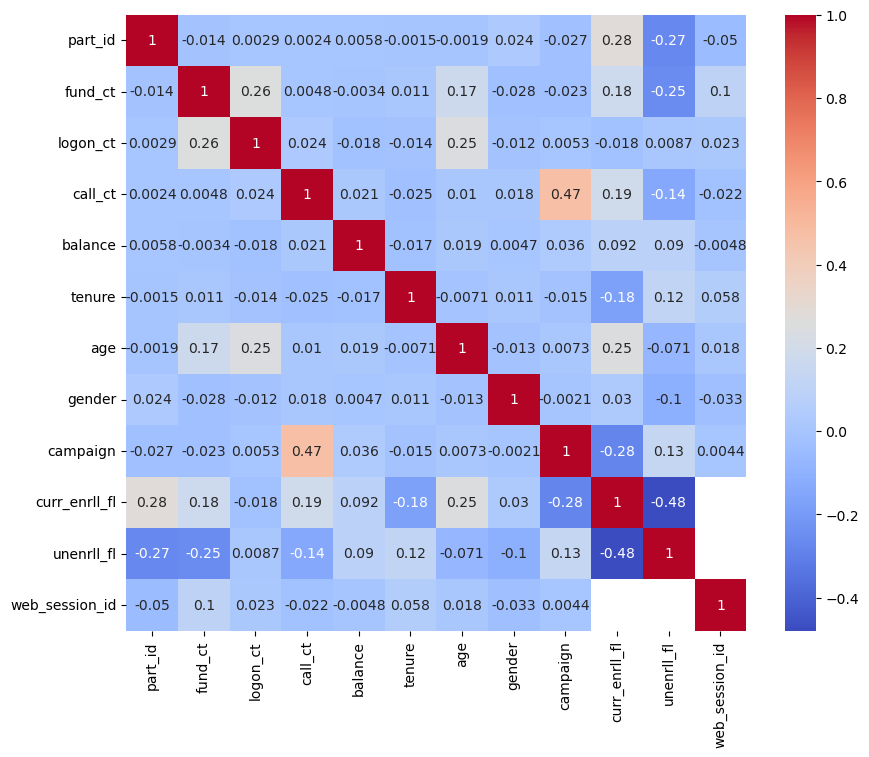

In [33]:
plt.figure(figsize=(10, 8))
correlation_matrix = filtered_merged.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\Avi\AppData\Local\Temp\ipykernel_10564\3369230378.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(enroll['click_dt'], enroll['part_id'], 'go', label='Click Date', linestyle='', marker='o')


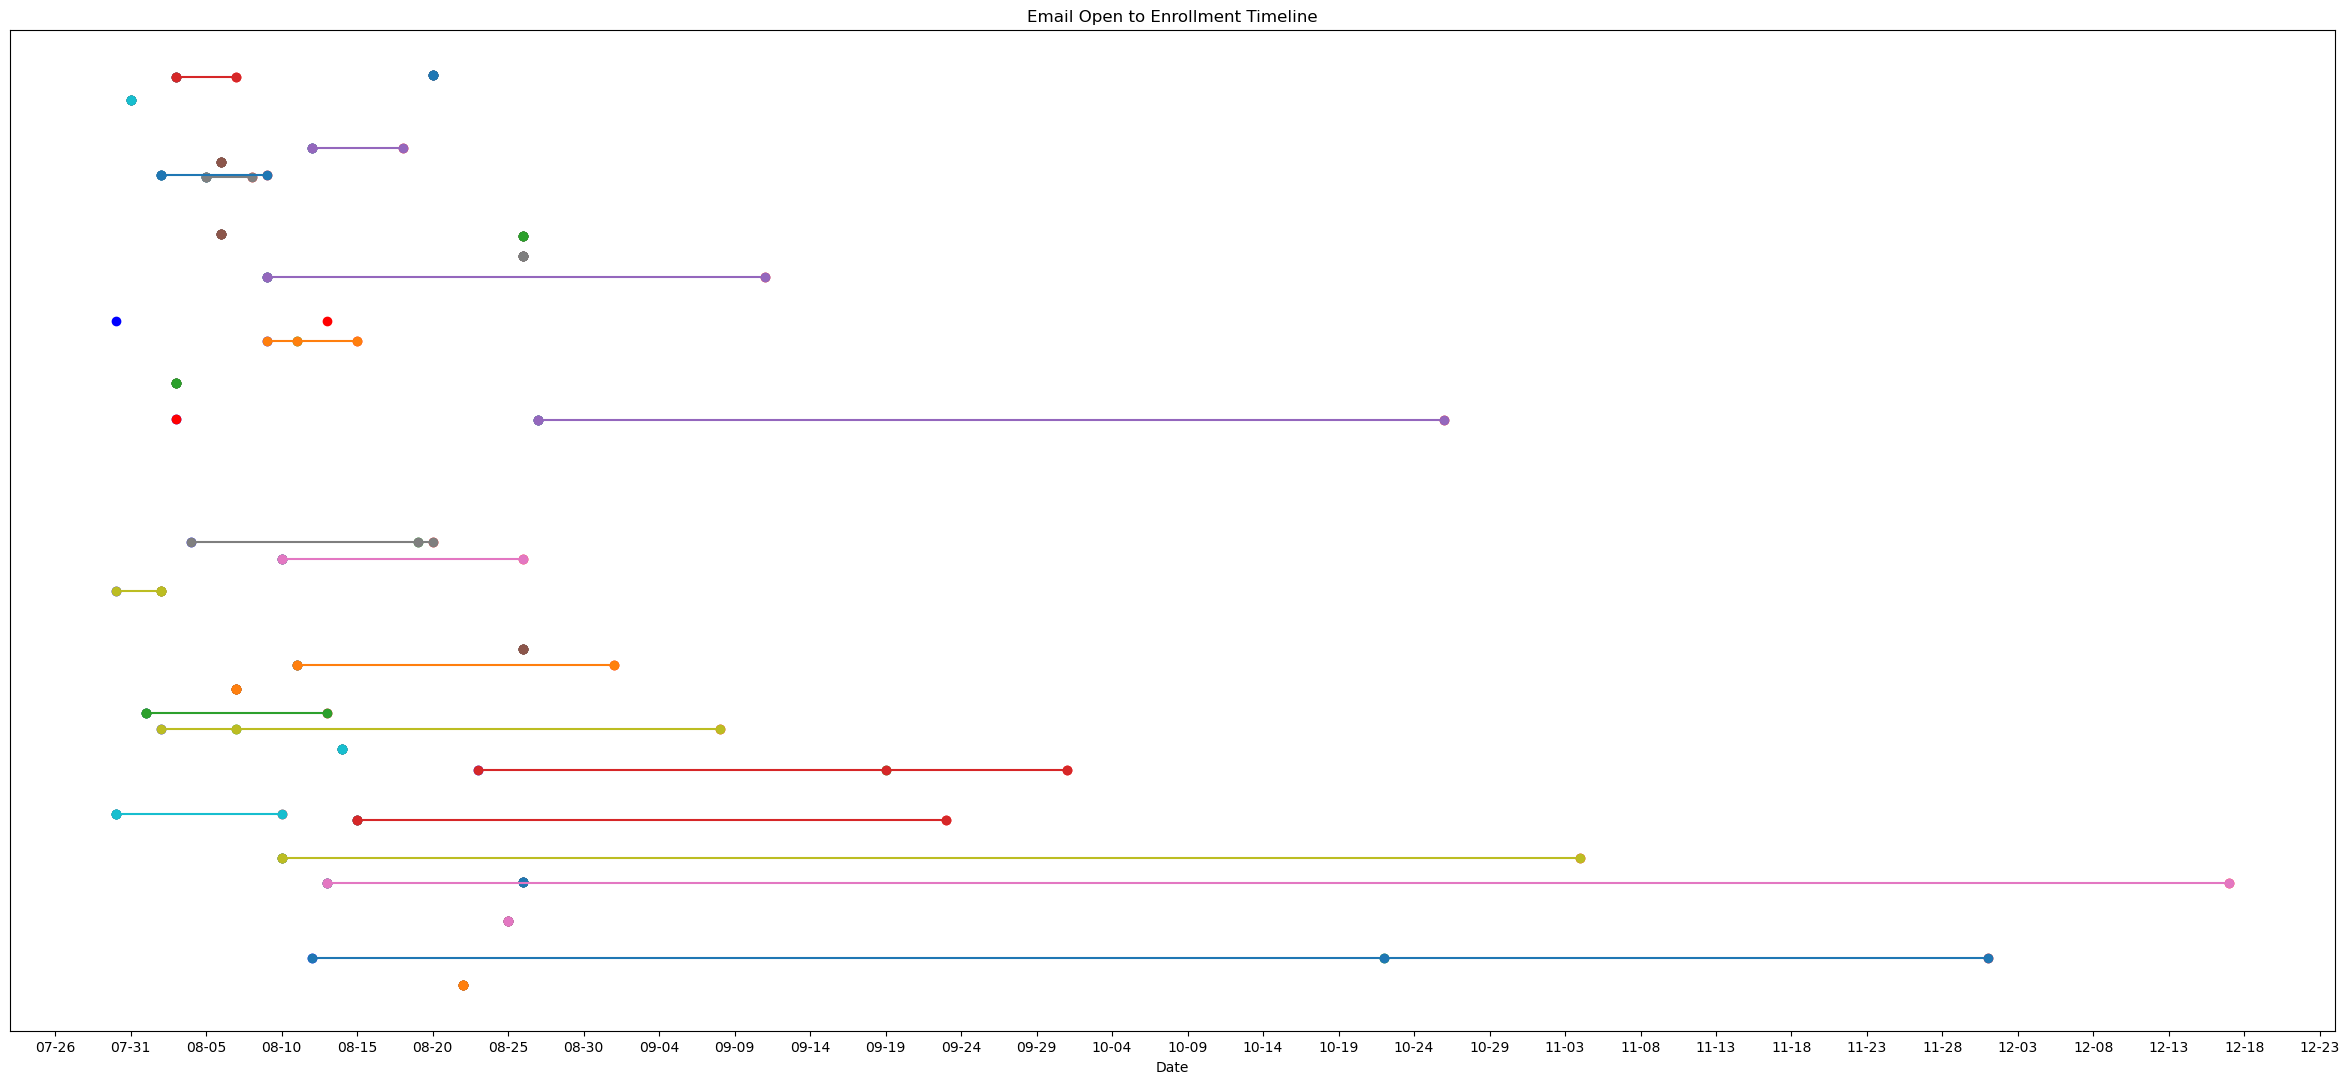

In [39]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(30, 13))
ax.plot(enroll['open_dt'], enroll['part_id'], 'bo', label='Open Date')
ax.plot(enroll['enrll_dt'], enroll['part_id'], 'ro', label='Enroll Date')
ax.plot(enroll['click_dt'], enroll['part_id'], 'go', label='Click Date', linestyle='', marker='o')


for idx, row in enroll.iterrows():
    part_id = row['part_id']
    open_date = row['open_dt']
    click_date = row['click_dt']
    enroll_date = row['enrll_dt']
    
    if not pd.isnull(click_date):  # Check for null click dates
        ax.plot([open_date, click_date, enroll_date], [part_id, part_id, part_id], 'o-', label=part_id)
    
ax.set_xlabel('Date')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.axes.get_yaxis().set_visible(False)
plt.title('Email Open to Enrollment Timeline')
plt.show()

In [41]:
clicked_welcome.head()

,part_id,fund_ct,logon_ct,call_ct,balance,tenure,age,gender,campaign,click_dt,bounce_dt,open_dt,web_session_id,hit_dt,page
9,6383658846,6,12,0,63973.64,5.3,44.4,0,0,2020-12-17,NaT,2020-11-12,2.384315e+09,2020-12-17,welcome
63,7080787001,7,12,1,71125.88,6.3,46.1,1,0,2020-12-02,NaT,2020-11-03,6.032407e+09,2020-12-02,welcome
99,8707006716,6,12,0,37744.01,6.2,44.2,0,0,2021-01-18,NaT,2020-08-01,5.465277e+09,2021-01-18,welcome
122,7599450035,6,11,0,99008.46,4.0,44.3,0,0,2020-09-20,NaT,2020-09-19,8.616221e+09,2020-09-20,welcome
197,1284743023,6,13,0,56107.42,6.4,46.3,1,1,2020-08-26,NaT,2020-08-26,8.930261e+09,2020-08-26,welcome


In [46]:
clicked_welcome_enrolled = clicked_welcome.merge(enroll_data, on = "part_id", how = "left")
clicked_welcome_enrolled = clicked_welcome_enrolled[(clicked_welcome_enrolled["enrll_dt"] >= clicked_welcome_enrolled["click_dt"]) &
                                                    (clicked_welcome_enrolled["click_dt"] >= clicked_welcome_enrolled["open_dt"])]
len(clicked_welcome_enrolled)

27

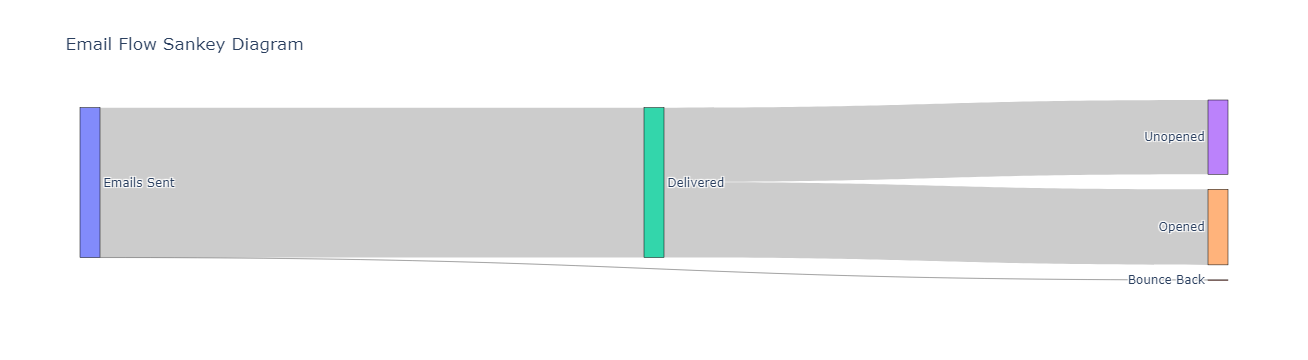

In [53]:
import plotly.graph_objects as go

# Define the nodes and links
nodes = ['Emails Sent', 'Bounce Back', 'Delivered', 'Unopened', 'Opened']
link_sources = [0, 0, 2, 2]  # Corresponding to 'Emails Sent', 'Emails Sent', 'Delivered', 'Delivered'
link_targets = [1, 2, 3, 4]  # Corresponding to 'Bounce Back', 'Delivered', 'Unopened', 'Opened'
link_values = [31, 37267, 18479, 18807]  # Corresponding to the values of each link

# Create the Sankey diagram figure
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=link_sources,
        target=link_targets,
        value=link_values
    )))

# Customize the appearance if needed
fig.update_layout(title_text="Email Flow Sankey Diagram")

# Show the plot
fig.show()


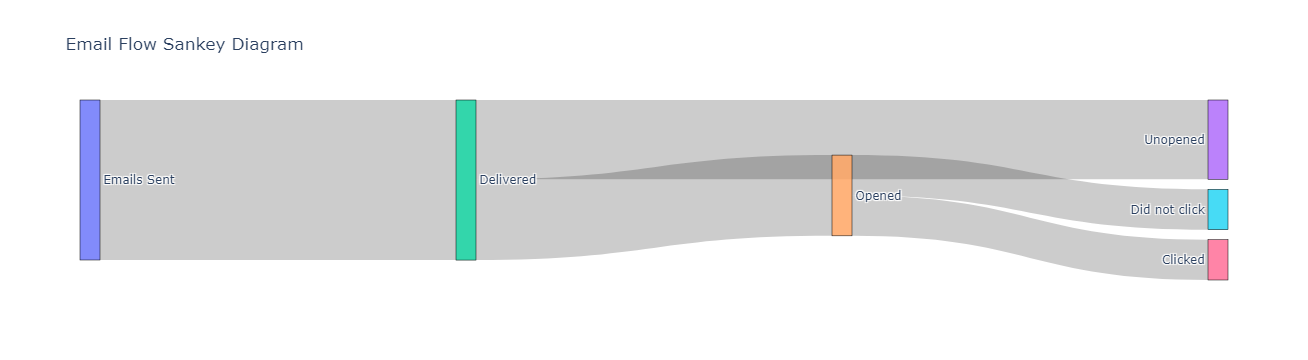

In [73]:
import plotly.graph_objects as go

# Define the nodes and links
nodes = ['Emails Sent', 'Bounce Back', 'Delivered', 'Unopened', 'Opened', "Did not click", "Clicked"]
link_sources = [0, 0, 2, 2, 4, 4]  # Corresponding to 'Emails Sent', 'Emails Sent', 'Delivered', 'Delivered'
link_targets = [1, 2, 3, 4, 5, 6]  # Corresponding to 'Bounce Back', 'Delivered', 'Unopened', 'Opened'
link_values = [0, 37267, 18479, 18807, 9411, 9377]  # Corresponding to the values of each link


# Create the Sankey diagram figure
fig = go.Figure(go.Sankey(
    arrangement="snap",  # Use the "fixed" arrangement
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
    ),
    link=dict(
        source=link_sources,
        target=link_targets,
        value=link_values
    )))

# Customize the appearance if needed
fig.update_layout(title_text="Email Flow Sankey Diagram")

# Show the plot
fig.show()
